In [1]:
import os
os.chdir("../..")
from MSML.src.math_spec_mapping import (load_from_json, create_action_chains_graph, write_out_boundary_actions,
                      write_out_policies, write_out_mechanisms, load_svg_graphviz, write_basic_report_full,
                      write_action_chain_reports, write_spec_tree, create_parameter_impact_table,
                     write_entity_reports, write_wiring_report, write_entity_markdown_report,
                     write_all_markdown_reports)
os.chdir("Quai-Macro-Model/Spec")

from IPython.display import display, display_html
from copy import deepcopy
from src import math_spec_json
import numpy as np
from pprint import pprint
from simulation import (state_base, params_base, vesting_schedule_translate,
                        build_logistic_classifier, post_processing_function,
                        plot_beta_errors, plot_betas, difficulty_metrics,
                        reward_metrics, controller_metrics, mined_ratio_metrics)
import numpy as np

ms = load_from_json(deepcopy(math_spec_json))


## Global Inputs

In [2]:
T = 2000
blocks = ["Log Simulation Data Mechanism"] + ["Price Movements Wiring",
            "Conversions Wiring",
            "Mine Block Wiring",
            "Unlock Tokens Wiring",
            "Update Population Beta Wiring",
            "Log Simulation Data Mechanism",] * T

## Sanity Check 0: Constant Difficulty, K Qi, K Quai, Population Beta Values

A simulation with the above state updates turned off to test basic simulation running.

Placeholder has no control action options
Metrics:
Difficulty Mu                        1.000000e+03
Difficulty Sigma                     0.000000e+00
Block Reward Ratio Mu                9.965784e-03
Block Reward Ratio Sigma             0.000000e+00
Conversion Rate Mu                   1.442695e-03
Conversion Rate Sigma                2.168946e-19
K Qi / K Quai Mu                     1.000000e+00
K Qi / K Quai Sigma                  0.000000e+00
Mined Ratio (Block Percent) Mu       5.000625e-01
Mined Ratio (Block Percent) Sigma    1.233635e-01
dtype: float64
      Estimate Beta0  Estimate Beta1  Population Beta0  Population Beta1  \
0                NaN             NaN         -5.017167              0.05   
1          -8.777618        0.082028         -5.017167              0.05   
2          -8.777538        0.090134         -5.017167              0.05   
3          -8.777548        0.089143         -5.017167              0.05   
4          -8.777534        0.090569         -5.017167

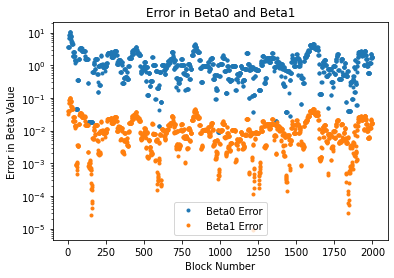

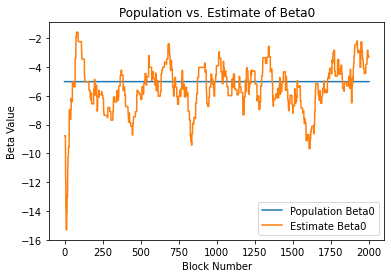

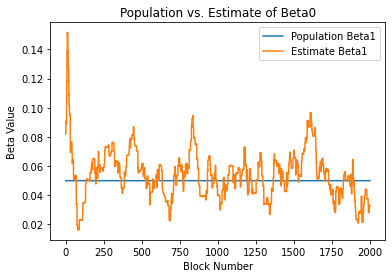

In [3]:
experiment = {"Name": "Test",
               "Param Modifications": {"State Update Skipping Parameter": ["K Qi/Quai", "Difficulty", "Population Beta"]},
               "State Modifications": {"Block Difficulty": 1000,
                                       "Population Mining Beta Vector": np.array([-5.017166594399686, 0.05])},
               "Blocks": blocks}


state, params, msi, df, metrics= ms.run_experiment(experiment,
                  params_base,
                  state_base,
                  post_processing_function,
                  state_preperation_functions=[vesting_schedule_translate, build_logistic_classifier],
                  parameter_preperation_functions=[],
                  metrics_functions=[difficulty_metrics, reward_metrics,
                                     controller_metrics, mined_ratio_metrics])
print("Metrics:")
print(metrics)
print(df)
plot_beta_errors(df)
plot_betas(df)

## Scenario A: Sanity Check Scenario

Premise: Ensure the simulation framework is operating as intended, without complications from the controller.

Condition(s): Fix the values of:
- $\mathbf u$, the controller update parameters ($k_{qi}, k_{quai}$); and
- $\pmb{\beta}$, the _miner decision population parameter vector_, i.e. the parameter vector for the miner's probabilistic decision on which token to receive as block reward.

Method: MC runs (across realizations of other stochastic variables), generating time series for e.g. miner decisions and proposed block rewards. 

Placeholder has no control action options
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low difficulties
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low difficulties
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low difficulties
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low difficulties
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low difficulties
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low difficulties
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low difficulties
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low difficulties
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low

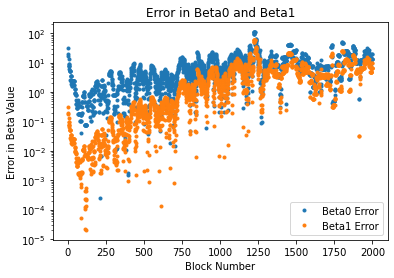

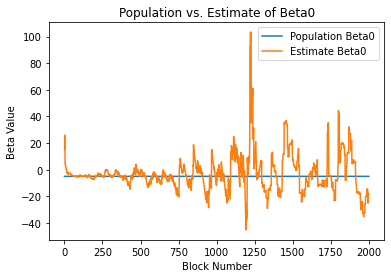

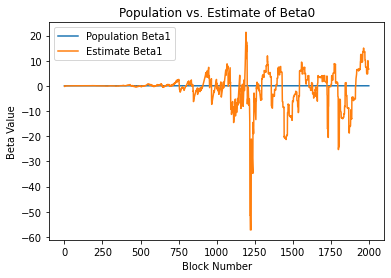

In [4]:
experiment = {"Name": "Test",
               "Param Modifications": {"State Update Skipping Parameter": ["K Qi/Quai", "Population Beta"]},
               "State Modifications": {"Block Difficulty": 1000,
                                       "Population Mining Beta Vector": np.array([-5.017166594399686, 0.05])},
               "Blocks": blocks}


state, params, msi, df, metrics= ms.run_experiment(experiment,
                  params_base,
                  state_base,
                  post_processing_function,
                  state_preperation_functions=[vesting_schedule_translate, build_logistic_classifier],
                  parameter_preperation_functions=[],
                  metrics_functions=[])

print(df)
plot_beta_errors(df)
plot_betas(df)

### Scenario B: fixed population parameters, miner model

Premise: To test the controller's ability to learn the miner decision population parameter vector when it is fixed, and to analyze the resulting time series.

**Condition(s)**: Fix the values of:
- $k_{quai}$ (control parameters $u_2$), as this is a _numeraire_ for the system; and
- $\pmb{\beta}$, the _miner decision population parameter vector_.

**Method**: MC runs (across realizations of other stochastic variables), generating time series for e.g. miner decisions, controller parameter estimates $\hat{\pmb{\beta}}$, and proposed block rewards.

Placeholder has no control action options
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low difficulties
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low difficulties
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low difficulties
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low difficulties
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low difficulties
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low difficulties
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low difficulties
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low difficulties
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low

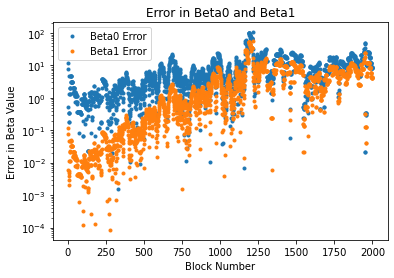

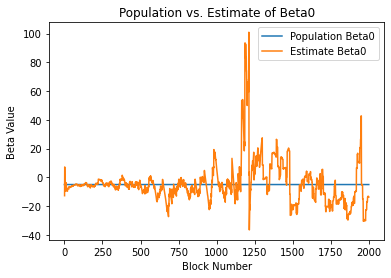

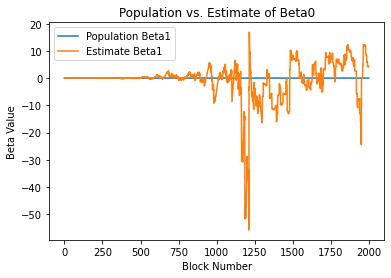

In [5]:
experiment = {"Name": "Test",
               "Param Modifications": {"State Update Skipping Parameter": ["Population Beta"]},
               "State Modifications": {"Block Difficulty": 1000,
                                       "Population Mining Beta Vector": np.array([-5.017166594399686, 0.05])},
               "Blocks": blocks}


state, params, msi, df, metrics= ms.run_experiment(experiment,
                  params_base,
                  state_base,
                  post_processing_function,
                  state_preperation_functions=[vesting_schedule_translate, build_logistic_classifier],
                  parameter_preperation_functions=[],
                  metrics_functions=[])

print(df)
plot_beta_errors(df)
plot_betas(df)

### Scenario C: variable population parameters, miner model

Premise: To test the controller's ability to learn the miner decision population parameter vector when it occasionally changes, and to analyze the resulting time series.

**Condition(s)**: 
- Fix the values of:
    - $k_{quai}$ (control parameters $u_2$), as this is a _numeraire_ for the system.
- Draw a realization of $\pmb{\beta}$ from a fixed distribution at two times:
    - Prior to the beginning of each MC run; and
    - Halfway through each MC run.

**Method**: MC runs (across realizations of other stochastic variables), generating time series for e.g. miner decisions, controller parameter estimates $\hat{\pmb{\beta}}$, and proposed block rewards.

Placeholder has no control action options
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low difficulties
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low difficulties
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low difficulties
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low difficulties
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low difficulties
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low difficulties
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low difficulties
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low difficulties
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low

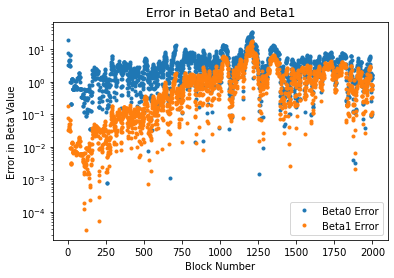

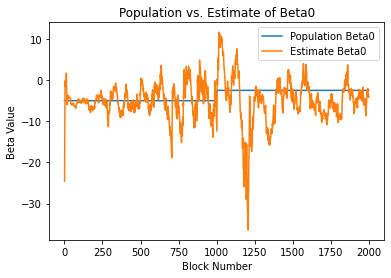

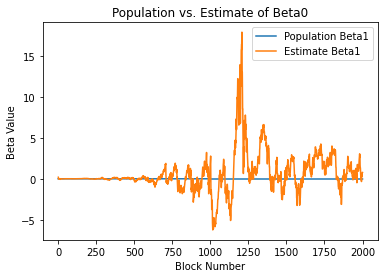

In [6]:
experiment = {"Name": "Test",
               "Param Modifications": {"State Update Skipping Parameter": [],
                                       "Population Beta Signal": [np.array([-5.017166594399686, 0.05])] * (T//2) +
                                       [np.array([-5.017166594399686/2, 0.05/2])] * (T//2+1)},
               "State Modifications": {"Block Difficulty": 1000,
                                       "Population Mining Beta Vector": np.array([-5.017166594399686, 0.05])},
               "Blocks": blocks}


state, params, msi, df, metrics= ms.run_experiment(experiment,
                  params_base,
                  state_base,
                  post_processing_function,
                  state_preperation_functions=[vesting_schedule_translate, build_logistic_classifier],
                  parameter_preperation_functions=[],
                  metrics_functions=[])

print(df)
plot_beta_errors(df)
plot_betas(df)